In [1]:
import pandas as pd
import matplotlib 

In [2]:
data = 'data/top25_airport_delays.csv'

In [3]:
delays_df = pd.read_csv(data)
delays_df.head()

,Unnamed: 0,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,0,2020,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",5985.0,445.0,142.89,...,1.0,127.79,5.0,0.0,30756.0,16390.0,1509.0,5060.0,16.0,7781.0
1,1,2020,12,9E,Endeavor Air Inc.,BOS,"Boston, MA: Logan International",21.0,3.0,1.00,...,0.0,0.00,0.0,0.0,158.0,17.0,81.0,60.0,0.0,0.0
2,2,2020,12,9E,Endeavor Air Inc.,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",96.0,17.0,8.50,...,0.0,3.40,1.0,0.0,1064.0,558.0,0.0,200.0,0.0,306.0
3,3,2020,12,9E,Endeavor Air Inc.,CLT,"Charlotte, NC: Charlotte Douglas International",42.0,1.0,1.00,...,0.0,0.00,0.0,0.0,64.0,64.0,0.0,0.0,0.0,0.0
4,4,2020,12,9E,Endeavor Air Inc.,DCA,"Washington, DC: Ronald Reagan Washington National",37.0,1.0,0.00,...,0.0,0.87,1.0,0.0,15.0,0.0,0.0,2.0,0.0,13.0


In [4]:
delays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           584 non-null    int64  
 1   year                 584 non-null    int64  
 2   month                584 non-null    int64  
 3   carrier              584 non-null    object 
 4   carrier_name         584 non-null    object 
 5   airport              584 non-null    object 
 6   airport_name         584 non-null    object 
 7   arr_flights          584 non-null    float64
 8   arr_del15            584 non-null    float64
 9   carrier_ct           584 non-null    float64
 10  weather_ct           584 non-null    float64
 11  nas_ct               584 non-null    float64
 12  security_ct          584 non-null    float64
 13  late_aircraft_ct     584 non-null    float64
 14  arr_cancelled        584 non-null    float64
 15  arr_diverted         584 non-null    flo

delays_df

In [5]:
carrier_df = delays_df[["year", "carrier", "carrier_name", "arr_cancelled", "arr_diverted", "arr_delay", "carrier_delay", "weather_delay",
                       "nas_delay", "security_delay", "late_aircraft_delay"]]

In [6]:
carrier_df

,year,carrier,carrier_name,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2020,9E,Endeavor Air Inc.,5.0,0.0,30756.0,16390.0,1509.0,5060.0,16.0,7781.0
1,2020,9E,Endeavor Air Inc.,0.0,0.0,158.0,17.0,81.0,60.0,0.0,0.0
2,2020,9E,Endeavor Air Inc.,1.0,0.0,1064.0,558.0,0.0,200.0,0.0,306.0
3,2020,9E,Endeavor Air Inc.,0.0,0.0,64.0,64.0,0.0,0.0,0.0,0.0
4,2020,9E,Endeavor Air Inc.,1.0,0.0,15.0,0.0,0.0,2.0,0.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...
579,2019,DL,Delta Air Lines Inc.,0.0,2.0,7715.0,2504.0,739.0,2969.0,0.0,1503.0
580,2019,DL,Delta Air Lines Inc.,0.0,5.0,23181.0,6984.0,443.0,5872.0,0.0,9882.0
581,2019,DL,Delta Air Lines Inc.,0.0,0.0,36694.0,4776.0,1207.0,26323.0,0.0,4388.0
582,2019,DL,Delta Air Lines Inc.,0.0,10.0,41721.0,17449.0,1681.0,7932.0,0.0,14659.0


In [7]:
column_list = ['arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']


In [8]:
carrier_df["total_delay"] = carrier_df.loc[:, column_list].sum(axis=1)

C:\Users\karso\AppData\Local\Temp\ipykernel_17796\1455824939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carrier_df["total_delay"] = carrier_df.loc[:, column_list].sum(axis=1)


In [9]:
carrier_df

,year,carrier,carrier_name,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,total_delay
0,2020,9E,Endeavor Air Inc.,5.0,0.0,30756.0,16390.0,1509.0,5060.0,16.0,7781.0,61512.0
1,2020,9E,Endeavor Air Inc.,0.0,0.0,158.0,17.0,81.0,60.0,0.0,0.0,316.0
2,2020,9E,Endeavor Air Inc.,1.0,0.0,1064.0,558.0,0.0,200.0,0.0,306.0,2128.0
3,2020,9E,Endeavor Air Inc.,0.0,0.0,64.0,64.0,0.0,0.0,0.0,0.0,128.0
4,2020,9E,Endeavor Air Inc.,1.0,0.0,15.0,0.0,0.0,2.0,0.0,13.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...
579,2019,DL,Delta Air Lines Inc.,0.0,2.0,7715.0,2504.0,739.0,2969.0,0.0,1503.0,15430.0
580,2019,DL,Delta Air Lines Inc.,0.0,5.0,23181.0,6984.0,443.0,5872.0,0.0,9882.0,46362.0
581,2019,DL,Delta Air Lines Inc.,0.0,0.0,36694.0,4776.0,1207.0,26323.0,0.0,4388.0,73388.0
582,2019,DL,Delta Air Lines Inc.,0.0,10.0,41721.0,17449.0,1681.0,7932.0,0.0,14659.0,83442.0


In [10]:
total_by_carrier = carrier_df.groupby(["carrier_name"])['total_delay'].sum()

In [11]:
total_by_carrier

carrier_name
Alaska Airlines Inc.        451258.0
Allegiant Air                71942.0
American Airlines Inc.     1919242.0
Delta Air Lines Inc.       1738890.0
Endeavor Air Inc.           503536.0
Envoy Air                   600438.0
ExpressJet Airlines LLC     318648.0
Frontier Airlines Inc.      323318.0
Hawaiian Airlines Inc.       16432.0
JetBlue Airways            1249142.0
Mesa Airlines Inc.          481070.0
PSA Airlines Inc.           484784.0
Republic Airline            678420.0
SkyWest Airlines Inc.      2074038.0
Southwest Airlines Co.     1226078.0
Spirit Air Lines            467592.0
United Air Lines Inc.      1407598.0
Name: total_delay, dtype: float64

AttributeError: 'Axes' object has no attribute 'show'

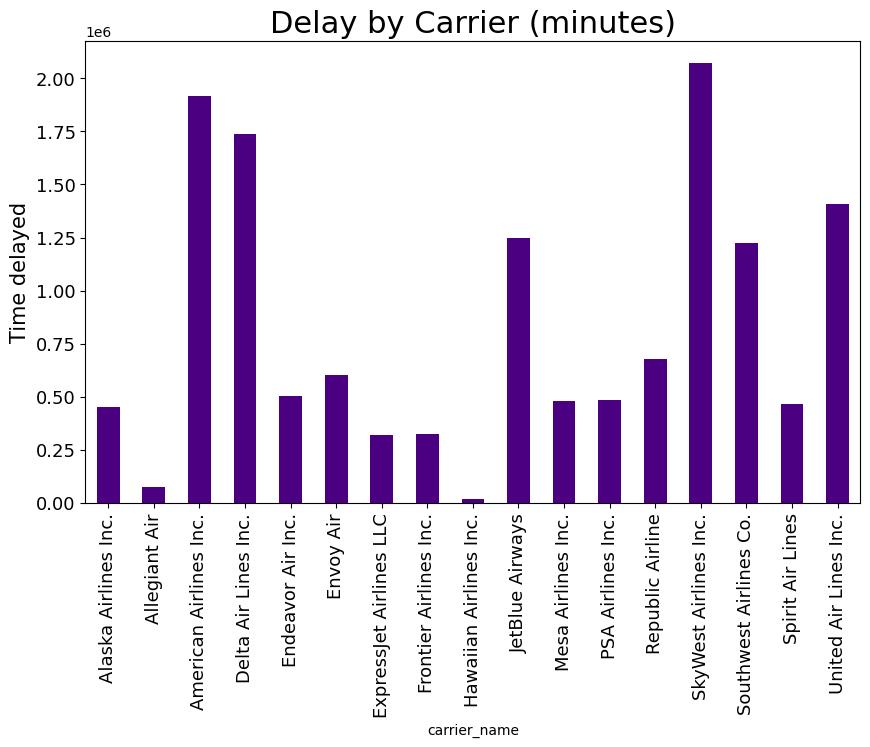

In [12]:
ax = total_by_carrier.plot(kind='bar', figsize=(10,6), color="indigo", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Delay by Carrier (minutes)", fontsize=22)
ax.set_ylabel("Time delayed", fontsize=15);
ax.show()

In [17]:
import plotly.express as px
selected_value = "ATL"
_2023df = pd.read_csv("data/rawYearlyData/clean_files/clean_2023.csv")
del _2023df["Unnamed: 0"]
def generate_bar(airport):
    selectedDF = _2023df.loc[_2023df["airport"] == airport].copy()
    column_list = ['arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
    selectedDF["total_delay"] = selectedDF.loc[:, column_list].sum(axis=1)
    selectedDF["proportion"] = round((selectedDF["total_delay"]/selectedDF["arr_flights"]),2)
    selectedDF_grouped = selectedDF.groupby(["carrier_name"])['proportion'].sum().reset_index()

    plot = px.bar(selectedDF_grouped, x='carrier_name', y='proportion',
            labels={'carrier_name': 'Carrier Name', 'proportion': 'Avg min Delayed per Flight'},
            title=f"Avg min Delayed per Flight at {airport}")
    return plot


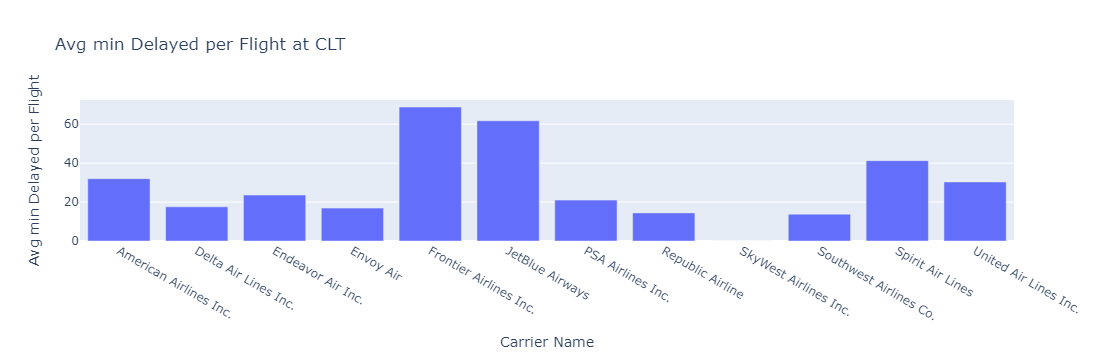

In [19]:
generate_bar("CLT")

In [21]:
df = pd.read_csv("data/merge_df.csv")
_2023df["carrier_name"].unique()

array(['Endeavor Air Inc.', 'American Airlines Inc.',
       'Alaska Airlines Inc.', 'JetBlue Airways', 'Delta Air Lines Inc.',
       'Frontier Airlines Inc.', 'Allegiant Air',
       'Hawaiian Airlines Inc.', 'Envoy Air', 'Spirit Air Lines',
       'PSA Airlines Inc.', 'SkyWest Airlines Inc.',
       'United Air Lines Inc.', 'Southwest Airlines Co.',
       'Republic Airline'], dtype=object)